# UNAD

## Amaury Garcia Osorio

### Predicción de presencia de enfermedad cardíaca por regresión Logística

#### Diseñar los modelos predictivos de Regresión Logística. Para el algoritmo realizar los siguientes pasos:
1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.
3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.
4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.
5. Entrenar el modelo configurando los diferentes hiperparámetros.
6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.
7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
8. Interpretar, analizar y documentar los resultados obtenidos.
9. Crear una cuenta en GitHub y cargar los códigos de los modelos diseñados https://github.com/

## 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [366]:
# cargar las librerias necesarias

import pandas as pd # Manejo de análisis y estructura de Datos
import numpy as np # Cálculo Númerico y el análisis de Datos
import seaborn as sns # Creación Gráficos Estadísticos
import matplotlib.pyplot as plt # Creación de Gráficas en dos dimensiones

# Librerías para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
 

In [368]:
# lectura de datos en python y lo cargamos en la variable Datos

Datos = pd.read_csv('./heart_cleveland_upload.csv')

In [370]:
#Realizar lectura de los Datos para el análisis exploratorio

Datos.head(40)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [372]:
# Descripción de los datos

Datos.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [374]:
# Comprobar valores nulos
Datos.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

Text(0.5, 1.0, 'Identificación de Datos faltantes y atípicos')

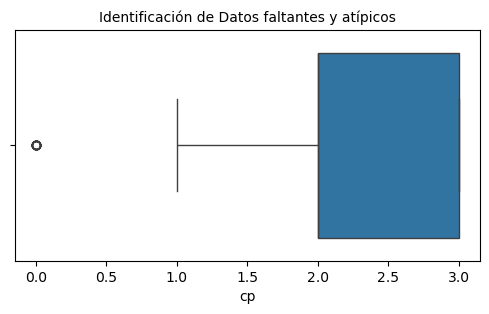

In [376]:
# Identificación de Datos faltantes y atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['cp'])
plt.title('Identificación de Datos faltantes y atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos faltantes y atípicos')

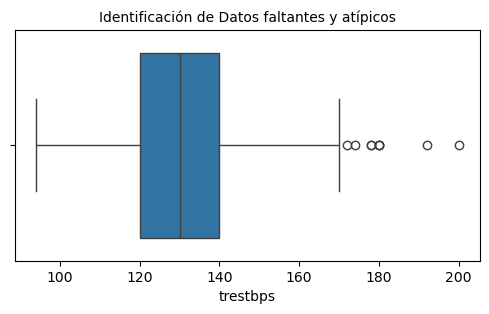

In [378]:
# Identificación de Datos faltantes y atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['trestbps'])
plt.title('Identificación de Datos faltantes y atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos faltantes y atípicos')

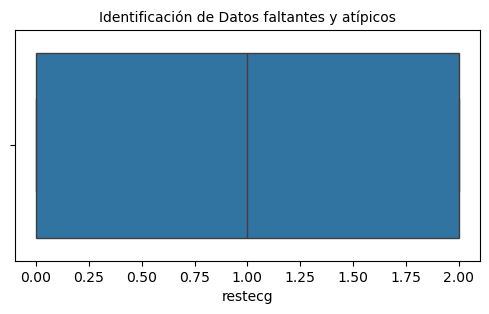

In [380]:
# Identificación de Datos faltantes y atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['restecg'])
plt.title('Identificación de Datos faltantes y atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos faltantes y atípicos')

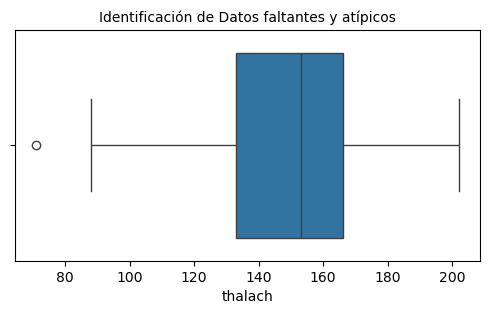

In [382]:
# Identificación de Datos faltantes y atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['thalach'])
plt.title('Identificación de Datos faltantes y atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos faltantes y atípicos')

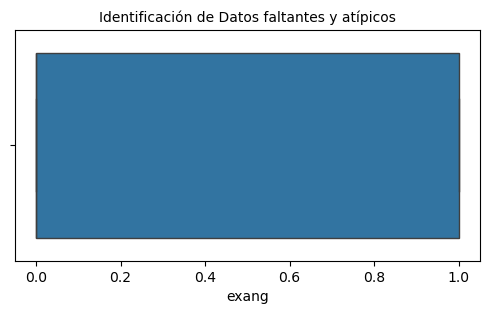

In [384]:
# Identificación de Datos faltantes y atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['exang'])
plt.title('Identificación de Datos faltantes y atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos faltantes y atípicos')

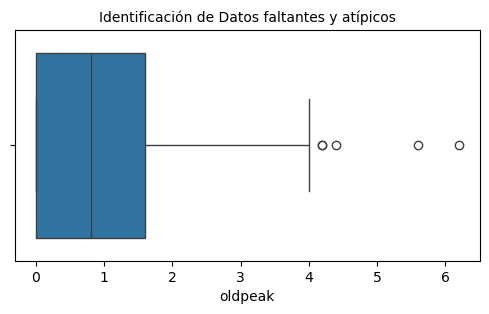

In [386]:
# Identificación de Datos faltantes y atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['oldpeak'])
plt.title('Identificación de Datos faltantes y atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos faltantes y atípicos')

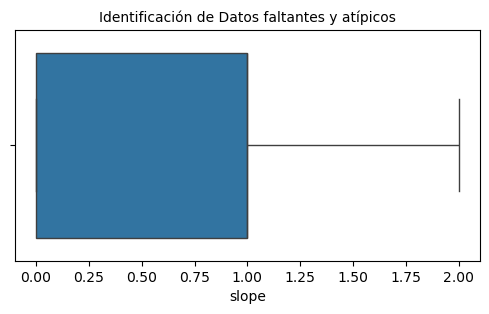

In [388]:
# Identificación de Datos faltantes y atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['slope'])
plt.title('Identificación de Datos faltantes y atípicos', fontsize=10 )

## 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

In [391]:
# Revisión de datos faltantes

print("cantidad de Registros sin datos almacenados en Nivel de cp: ",Datos['cp'].isnull().sum())
print("cantidad de Registros sin datos almacenados en Nivel de trestbps: ",Datos['trestbps'].isnull().sum())
print("cantidad de Registros sin datos almacenados en Nivel de restecg: ",Datos['restecg'].isnull().sum())
print("cantidad de Registros sin datos almacenados en Nivel de thalach: ",Datos['thalach'].isnull().sum())
print("cantidad de Registros sin datos almacenados en Nivel de exang: ",Datos['exang'].isnull().sum())
print("cantidad de Registros sin datos almacenados en Nivel de oldpeak: ",Datos['oldpeak'].isnull().sum())
print("cantidad de Registros sin datos almacenados en Nivel de slope: ",Datos['slope'].isnull().sum())

cantidad de Registros sin datos almacenados en Nivel de cp:  0
cantidad de Registros sin datos almacenados en Nivel de trestbps:  0
cantidad de Registros sin datos almacenados en Nivel de restecg:  0
cantidad de Registros sin datos almacenados en Nivel de thalach:  0
cantidad de Registros sin datos almacenados en Nivel de exang:  0
cantidad de Registros sin datos almacenados en Nivel de oldpeak:  0
cantidad de Registros sin datos almacenados en Nivel de slope:  0


### Reemplazar todos los valores vacios con el valor medio (promedio) de la columna.

no se encontraron campos vacios en la BD 

In [394]:
# Revisión Nuevamente de datos faltantes

print("cantidad de Registros vacios en Nivel de cp: ",Datos['cp'].isin([]).sum())
print("cantidad de Registros vacios en Nivel de trestbps: ",Datos['trestbps'].isin([]).sum())
print("cantidad de Registros vacios en Nivel de restecg: ",Datos['restecg'].isin([]).sum())
print("cantidad de Registros vacios en Nivel de thalach: ",Datos['thalach'].isin([]).sum())
print("cantidad de Registros vacios en Nivel de exang: ",Datos['exang'].isin([]).sum())
print("cantidad de Registros vacios en Nivel de oldpeak: ",Datos['oldpeak'].isin([]).sum())
print("cantidad de Registros vacios en Nivel de slope: ",Datos['slope'].isin([]).sum())

cantidad de Registros vacios en Nivel de cp:  0
cantidad de Registros vacios en Nivel de trestbps:  0
cantidad de Registros vacios en Nivel de restecg:  0
cantidad de Registros vacios en Nivel de thalach:  0
cantidad de Registros vacios en Nivel de exang:  0
cantidad de Registros vacios en Nivel de oldpeak:  0
cantidad de Registros vacios en Nivel de slope:  0


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

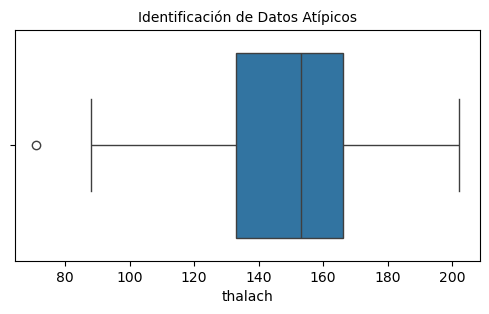

In [396]:
# Identificación de Datos Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['thalach'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [398]:
#Conteo de Datos Atípicos

nivel_minimo=90
nivel_maximo=200
Total_Atipicos=((Datos['thalach']<nivel_minimo)|(Datos['thalach']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 3


In [400]:
# Filtra Datos Atípicos

Datos=Datos[(Datos['thalach']<nivel_maximo)&(Datos['thalach']>nivel_minimo)]

In [402]:
# Validar si se removieron los datos atípicos

Total_Atipicos=((Datos['thalach']<nivel_minimo)|(Datos['thalach']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [404]:
#Revisión del tipo de datos y datos faltantes

Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 293 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        293 non-null    int64  
 1   sex        293 non-null    int64  
 2   cp         293 non-null    int64  
 3   trestbps   293 non-null    int64  
 4   chol       293 non-null    int64  
 5   fbs        293 non-null    int64  
 6   restecg    293 non-null    int64  
 7   thalach    293 non-null    int64  
 8   exang      293 non-null    int64  
 9   oldpeak    293 non-null    float64
 10  slope      293 non-null    int64  
 11  ca         293 non-null    int64  
 12  thal       293 non-null    int64  
 13  condition  293 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 34.3 KB


# 3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

Característica de interes:

- Condition: si la persona tiene enfermedad cardíaca o no (0 = no tiene enfermedad cardíaca - 1 = si tiene enfermedad cardíaca)
- Predecir si una persona puede tener enfermedad cardíaca

In [407]:
# Total de personas con enfermedad cardíaca

Datos['condition'].value_counts()

condition
0    159
1    134
Name: count, dtype: int64

In [409]:
Datos[['condition']].head(40)

,condition
0,0
1,0
2,0
3,1
4,0
5,0
6,0
7,1
8,0
9,0


# 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.

In [412]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%

# Se crean variables X y Y para almacenar la información del entrenamiento

X = Datos.drop('condition',axis=1) # Se cargan los datos de train sin los datos de la columna condition 
Y = Datos['condition'] # Se cargan los datos de train con los datos de la la columna condition

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [414]:
print (X_train)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
268   48    1   3       122   222    0        2      186      0      0.0   
53    48    1   1       130   245    0        2      180      0      0.2   
206   59    1   3       170   326    0        2      140      1      3.4   
52    48    1   1       110   229    0        0      168      0      1.0   
290   41    1   3       110   172    0        2      158      0      0.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
227   57    1   3       110   201    0        0      126      1      1.5   
248   54    1   3       122   286    0        2      116      1      3.2   
204   60    1   3       130   253    0        0      144      1      1.4   
213   58    1   3       114   318    0        1      140      0      4.4   
114   53    1   2       130   197    1        2      152      0      1.2   

     slope  ca  thal  
268      0   0     0  
53       1   0     0  
206      2   0    

In [416]:
print (Y_train)

268    0
53     0
206    1
52     1
290    1
      ..
227    0
248    1
204    1
213    1
114    0
Name: condition, Length: 219, dtype: int64


# 5. Entrenar el modelo configurando los diferentes hiperparámetros

In [419]:
# Construir el modelo de regresión logística 

modelo_regresion = LogisticRegression(solver = "liblinear") # liblinear es una libreria para resolver problemas lineales de clasificación y regresión
modelo_regresion.fit (X_train , Y_train)   

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) # la función predict predice los valores a partir del conjunto de datos de validación

In [421]:
print (Y_test)

112    0
257    1
247    1
96     1
285    0
      ..
172    0
193    1
138    0
243    1
184    1
Name: condition, Length: 74, dtype: int64


In [423]:
print (Prediccion)

[0 0 1 0 0 1 1 1 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0
 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 1 0 1 1]


# 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc

In [426]:
# Desempeño del modelo de regresión

print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85        40
           1       0.84      0.79      0.82        34

    accuracy                           0.84        74
   macro avg       0.84      0.83      0.84        74
weighted avg       0.84      0.84      0.84        74



# 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

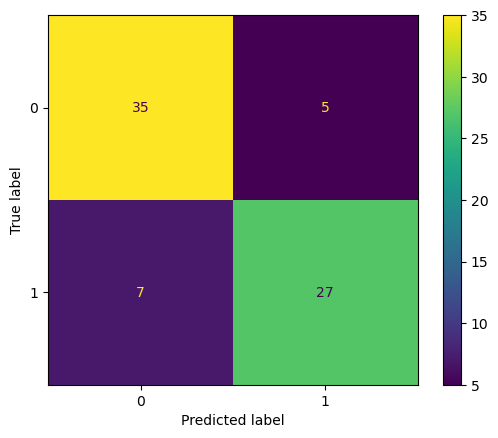

In [429]:
#Matrix de Confusión del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

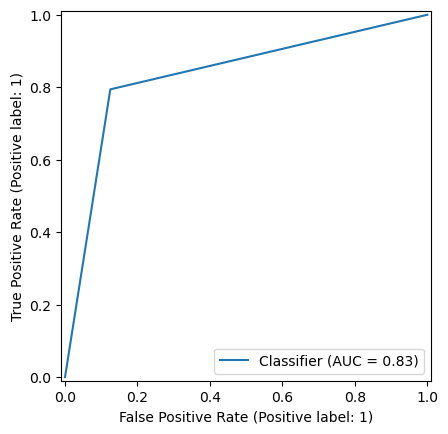

In [431]:
# Curva de precisón del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()

# 8. Interpretar, analizar y documentar los resultados obtenidos

Del desempeño del modelo se puede describir:

- Precisión: Precisión mide la proporción de predicciones positivas verdaderas entre todas las predicciones positivas realizadas por el modelo. Aquí la precisión para la clase "Condition" es 0,84, lo que significa que el 84% de los predichos como enfermedad cardíaca por el modelo tenian en realidad una enfermedad cardíaca.

- Recall: Mide la proporción de predicciones positivas verdaderas entre todas las instancias positivas reales en el conjunto de datos. Aquí el Recall para la clase "condition" es 0,79, lo que indica que el modelo identificó correctamente al 79 % de todos los enfermedad cardíaca.

- F1 Score: Es la media armónica de precisión y recuperación. Proporciona una puntuación única que equilibra la Precisión y Recall. Aquí la puntuación F1 para la clase "condition" es 0,82, lo que indica un equilibrio entre precisión y recuerdo.

De la Matriz de Confusión podemos interpretar:

- Verdaderos negativos: el recuento de observaciones que un clasificador predijo correctamente como falso 35

- Verdaderos positivos: el recuento de observaciones que un clasificador predijo correctamente como Verdadero 27

- Falsos positivos: el recuento de observaciones que un clasificador predijo incorrectamente como Verdaderas 5

- Falsos negativos: el recuento de observaciones que un clasificador predijo incorrectamente como falso 7

De la curva de precisión del modelo se puede interpretar:

- El AUC es 0,83 lo que significa que el 83 % de las predicciones del clasificador son correctas en todos los umbrales de clasificación.